# Prevendo consumo de cerveja de uma área na cidade de São Paulo, Brasil.

O objetivo desta análise foi realizar uma regressão linear com a finalidade de gerar um simulador que prever o consumo de cerveja a partir de variáveis previamente coletadas.

Os dados foram coletados na cidade de São Paulo em uma área universitária e disponibilizados através do site <a href="https://www.kaggle.com/">Kaggle</a>. Mais informações a respeito do dataset pode ser verificado <a href="https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo">aqui</a>.

### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot
import cufflinks as cf
init_notebook_mode(connected = True)
cf.go_offline()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

### Análise exploratória os dados

In [2]:
df =  pd.read_csv("Consumo_cerveja.csv")
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


##### Verificando o tamanho dos dados

In [3]:
df.shape

(941, 7)

##### Verificando tipo de dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


<p style="text-align: justify">Os dados de data, temperatura e precipitação estão no formato de texto, dessa maneira será feita a mudança para um formato de dado adequado.</p>

### Mudando o formato dos dados

##### Transformando em data

In [5]:
df['Data'] = pd.to_datetime(df['Data'])

##### Mudando "," por  "."

In [6]:
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].apply(lambda x: str(x).replace(",",".")) 
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].apply(lambda x: str(x).replace(",",".")) 
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].apply(lambda x: str(x).replace(",",".")) 
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].apply(lambda x: str(x).replace(",",".")) 

##### Transformando em ponto flutuante

In [7]:
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].astype("float64")
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].astype("float64")
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].astype("float64")
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].astype("float64")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 51.6 KB


<p>Agora os dados possuem os formatos corretos para suas respectivas colunas.</p>

##### Verificando dados nulos

In [9]:
df.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

<p style="text-align: justify">É possível verificar a existência de dados nulos em todas as colunas do banco de dados. Logo, será feita a remoção desses dados a fim de permitir a análise sem maiores problemas.</p>

#####  Retirando os dados nulos

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

##### Verificando o tamanho do dataset

In [12]:
df.shape

(365, 7)

<p style="text-align: justify"> Realizada a etapa de limpeza do banco de dados, será necessário agora realizar a análise exploratória dos dados para verificar como as variáveis se comportam.</p> 

##### Verificando estatísticas dos dados

In [13]:
df.describe().round(4)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.0000,365.0000,365.0000,365.0000,365.0000,365.0000
mean,21.2264,17.4614,26.6115,5.1967,0.2849,25.4014
std,3.1801,2.8262,4.3174,12.4178,0.4520,4.3991
min,12.9000,10.6000,14.5000,0.0000,0.0000,14.3430
25%,19.0200,15.3000,23.8000,0.0000,0.0000,22.0080
50%,21.3800,17.9000,26.9000,0.0000,0.0000,24.8670
75%,23.2800,19.6000,29.4000,3.2000,1.0000,28.6310
max,28.8600,24.5000,36.5000,94.8000,1.0000,37.9370


<p style="text-align: justify">É possível observar diversos valores (média, máxima e mínimo) das variáveis númericas do dataset. Entretanto, para melhor verificação, é necessário visualizar como essas variáveis se comportam em relação a variável de resposta (Consumo de cerveja). Assim, serão feitos gráficos para melhor visualização dessas relações.</p>

##### Plotando gráficos

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Data'], y = df['Consumo de cerveja (litros)'].rolling(7).mean(), 
                         mode = 'lines', name="Média móvel de 7 dias do consumo de cerveja",line = dict(color = 'red', width=1.5)))
fig.add_trace(go.Bar(x = df['Data'], y = df['Consumo de cerveja (litros)'], 
                         name="Consumo de cerveja(L)",marker_color='seagreen'))
fig.update_layout(title = 'Consumo de Cerveja por dia entre 2015-2016',title_font_size=20,title_pad_t=3,
                yaxis_title='Consumo(L)',margin = dict(autoexpand=False),
             showlegend=True, plot_bgcolor='white',
legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,bargap=0.3)
fig.update_xaxes(title_font_size=18)
fig.update_yaxes(title_font_size=18)
fig

<p style="text-align: justify"> É possível verificar uma oscilação no consumo de cerveja a longo do ano, com um consumo médio de aproximadamente 25 litros por dia. O consumo mais alto ocorreu no verão (10-01-2015) e o menor no inverno(22-07-2015). Esses valores podem indicar que o consumo de cerveja pode variar em relação a temperatura e precipitação. Abaixo segue esses gráficos:</p>

In [15]:
fig=go.Figure()

fig.add_trace(go.Bar(x = df['Temperatura Media (C)'], y = df['Consumo de cerveja (litros)'], 
                         marker_color='deepskyblue', width=0.15))
fig.update_layout(title = 'Consumo de cerveja com relação a temperatura média',
                  title_font_size=20,title_pad_t=3,xaxis_title='Temperatura média(C)', yaxis_title='Consumo(L)',
                  margin = dict(autoexpand=False),
             showlegend=False, plot_bgcolor='white',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
),barmode='group',bargap=0.7)
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    paper_bgcolor="white")
fig.update_xaxes(title_font_size=18)
fig.update_yaxes(title_font_size=18)

fig

<p style="text-align: justify">Como esperado, o consumo de cerveja cresceu quando a temperatura média variou entre 21° e 24°C. Entretanto, valores acima dos 24°C tiveram valores mais baixos de consumo de cerveja.</p>

In [16]:
fig=go.Figure()
fig.add_trace(go.Scatter(x = df['Precipitacao (mm)'], y = df['Consumo de cerveja (litros)'], 
                         mode="markers",marker_color='deepskyblue'))
fig.update_layout(title = 'Consumo de cerveja com relação a precipitação',
                  title_font_size=20,title_pad_t=3,xaxis_title='Precipitacao (mm)', yaxis_title='Consumo(L)',
                  margin = dict(autoexpand=False),
             showlegend=False, plot_bgcolor='white',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
),barmode='group')
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    paper_bgcolor="white")
fig.update_xaxes(title_font_size=18)
fig.update_yaxes(title_font_size=18)

fig

<p style="text-align: justify">Como pode ser observado no gráfico acima, a maior parte do consumo de cerveja ocorreu quando não houve chuva (0mm). Além disso, a medida que a precipitação aumentou houve uma tendência a declínio do consumo de cerveja. Além disso, é possível que haja também um comportamento de maior consumo de cerveja aos finais de semana, visto que as pessoas normalmente não trabalham nesses dias. Abaixo segue o gráfico:</p>

In [36]:
fig=go.Figure()
fig.add_trace(go.Box(x = df['Final de Semana'], y = df['Consumo de cerveja (litros)'], 
                         marker_color='deepskyblue'))
fig.update_layout(title = 'Consumo de cerveja com relação e finais de semana',
                  title_font_size=20,title_pad_t=3,xaxis_title='Final de Semana', yaxis_title='Consumo(L)',
                  margin = dict(autoexpand=False),
             showlegend=False, plot_bgcolor='white',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
),barmode='group')
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    paper_bgcolor="white")
fig.update_xaxes(title_font_size=18)
fig.update_yaxes(title_font_size=18)

fig

<p style="text-align: justify">Como esperado, na média houve um maior consumo durante os finais de semana(1). A partir dessa exploração, é importante verificar correlações existentes entre as variáveis citadas acima e o consumo de cerveja. </p>

##### Verificando a correlação entre variáveis

In [18]:
df.corr().round(2)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.00,0.86,0.92,0.02,-0.05,0.57
Temperatura Minima (C),0.86,1.00,0.67,0.10,-0.06,0.39
Temperatura Maxima (C),0.92,0.67,1.00,-0.05,-0.04,0.64
Precipitacao (mm),0.02,0.10,-0.05,1.00,0.00,-0.19
Final de Semana,-0.05,-0.06,-0.04,0.00,1.00,0.51
Consumo de cerveja (litros),0.57,0.39,0.64,-0.19,0.51,1.00


<p style="text-align: justify">É possível observar através da tabela acima, que houve correlação positiva entre as variáveis de temperatura(máxima, média e mínima) e final de semana. Ou seja, o aumento da temperatura e ser final de semana está correlacionado ao aumento do consumo de cerveja. Enquanto que com a precipitação o efeito é inverso, ou seja, apresenta uma correlação negativa em que com o aumento dessa variável (precipitação) está correlacionado a uma diminuição do consumo de cerveja. Abaixo segue gráficos para uma melhor visualização dessas variáveis</p>

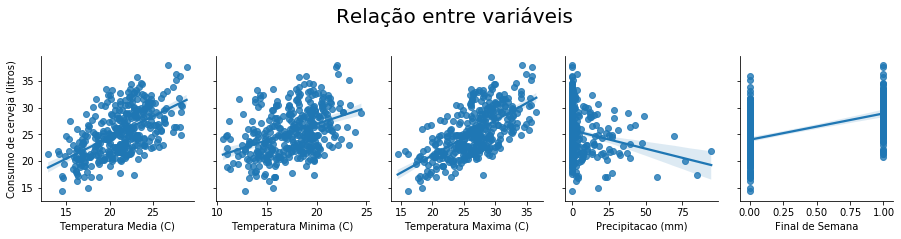

In [20]:
ax=sns.pairplot(df, y_vars="Consumo de cerveja (litros)", x_vars=["Temperatura Media (C)","Temperatura Minima (C)","Temperatura Maxima (C)","Precipitacao (mm)","Final de Semana"],kind="reg")
ax.fig.suptitle("Relação entre variáveis",y=1.25,fontsize=20)
ax

### Gerando o modelo de previsão de consumo

<p style="text-align: justify">Com base na exploração das variáveis em relação ao consumo de cerveja, é possível construir um modelo de regressão linear que possa prever o consumo de cerveja a partir das variáveis analisadas (Temperatura, precipitação e final de semana). Esse modelo pode ser útil a fim de buscar aumentar vendas ou diminuir custos da venda da bebida ao longo do ano. Assim, segue abaixo como será feita a construção desse modelo.</p>

##### Selecionando as variáveis

<p style="text-align: justify">Como variável de resposta será escolhido o consumo de cerveja e as variáveis preditoras serão Temperatura máxima, Precipitação e Final de semana.</p>

In [42]:
y= df["Consumo de cerveja (litros)"]
x =  df[["Temperatura Maxima (C)","Precipitacao (mm)","Final de Semana"]]

##### Separando os dados de treino e teste
A separação de dados de treino e teste é feita para que não haja sobreajuste dos modelo em relação ao dados. Dessa forma, será realizada a separação em 70% dos dados em treino e 30% em teste. 

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.30, random_state=1983)

In [44]:
#Instanciando o modelo
modelo=LinearRegression()

##### Treinando o modelo

In [45]:
modelo.fit(x_train,y_train)

LinearRegression()

#### Avaliando os valores previstos do modelo

In [46]:
y_prev=modelo.predict(x_test)

In [47]:
print("Modelo treinado - R² = {}".format(modelo.score(x_train,y_train).round(2)))
print("Previsão do modelo - R² = %s" % metrics.r2_score(y_test,y_prev).round(2))

Modelo treinado - R² = 0.73
Previsão do modelo - R² = 0.68


<p style="text-align: justify">A partir do coeficiente de determinação (R²) foi possível verificar que os dados de treino explicou 72% de toda a variação existente da relação (consumo x temperatura, precipitação e final de semana) contra 68% dos dados de teste. Entretanto é necessário verificar a precisão geral do modelo em relação aos dados, assim será usado a métrica do erro médio quadrático que quanto menor o valor menor é o erro em relação aos valores reais.</p>

#### Raiz quadrada do erro quadrático médio(RMSE)

In [48]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_prev)).round(2)
R2 =metrics.r2_score(y_test,y_prev).round(2)
pd.DataFrame([rmse,R2],["RMSE","R²"],columns=["Métricas do modelo"])

,Métricas do modelo
RMSE,2.20
R²,0.68


<p style="text-align: justify">A partir dessas análises, é possível criar um simulador do consumo de cerveja em relação as variáveis preditoras (Temperatura, precipitação e final de semana). Segue abaixo o simulador:</p>

### Simulador para previsão o consumo de cerveja.

##### Gerando uma simulação pontual

In [49]:
entrada= x_test[0:1]
entrada

,Temperatura Maxima (C),Precipitacao (mm),Final de Semana
185,14.5,4.4,1.0


In [50]:
modelo.predict(entrada)[0]

20.96092945792247

##### Simulador

In [52]:
temp_max=10
precipitação=4.4
fds=0
entrada=[[temp_max,precipitação,fds]]

print("{0:.2f} litros".format(modelo.predict(entrada)[0]))

12.27 litros


Desse modo, a partir dos dados do dataset foi possível prever o consumo de cerveja com as variáveis de Temperatura Maxima, Precipitação e Finais de semana. Através de outras técnicas, esse modelo pode ser melhorado a fim de criar um simulador mais preciso e que possa prever o consumo de cerveja com mais segurança a partir de dados previamente coletados. Isso pode ser bastante útil em negócios que dependam da venda dessas bebidas, pois pode ajudar tanto na geração de lucro como na diminuição de despesas. 